In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_csv("../raw_data/tweets_01-08-2021.csv")

In [13]:
data

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f


## select the data we need

In [14]:
data.date = pd.to_datetime(data.date, format="%Y-%m-%d", errors='coerce')

In [15]:
data_need = data[(data.date < datetime(2017, 3, 1)) & (data.date > datetime(2016, 9, 1))]

In [16]:
data_need = data_need.sort_values("date", ascending=False)

In [17]:
data_need

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
45515,836406328369242113,I will be interviewed on @foxandfriends at 6:0...,f,f,Twitter for Android,70547,8987,2017-02-28 02:43:03,f
45516,836332166728527872,"GOP now viewed more favorably than Dems, in Tr...",f,f,Twitter for iPhone,59279,11710,2017-02-27 21:48:21,f
45517,836261209540288513,Great meeting with CEOs of leading U.S. health...,f,f,Twitter for iPhone,76581,12500,2017-02-27 17:06:23,f
45518,835946001873657858,Big dinner with Governors tonight at White Hou...,f,f,Twitter for Android,90079,12681,2017-02-26 20:13:52,f
45519,835916511944523777,"Russia talk is FAKE NEWS put out by the Dems, ...",f,f,Twitter for Android,94932,19841,2017-02-26 18:16:41,f
...,...,...,...,...,...,...,...,...,...
40254,771206171856207873,RT @LouDobbs: We are Watching A Leader Who for...,t,f,Twitter for iPhone,0,7512,2016-09-01 04:40:54,f
40255,771206056454127616,RT @AnnCoulter: I hear Churchill had a nice tu...,t,f,Twitter for iPhone,0,7181,2016-09-01 04:40:26,f
40256,771150050940497920,Just arrived in Arizona! #ImWithYouhttps://t.c...,f,f,Twitter for iPhone,12023,2618,2016-09-01 00:57:54,f
40257,771146302134423552,Great trip to Mexico today - wonderful leader...,f,f,Twitter for Android,28739,7954,2016-09-01 00:43:00,f


In [18]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


# clean text data and finish the preprocess

def first_clean(text):
    rawData = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return rawData.split()


def bind_together(input):
    return [i for item in input for i in item]


def clean_not_words(input):
    english_words = set(nltk.corpus.words.words())
    return [i for i in input if i in english_words]


text = [i for i in data_need.loc[:, "text"]]

first_clean_words = bind_together([first_clean(i) for i in text])

second_clean_words = [w for w in first_clean_words if w not in stopwords.words('english')]

need_english_words = clean_not_words(second_clean_words)

lemmed = [WordNetLemmatizer().lemmatize(w) for w in need_english_words]

In [19]:
lemmed

['enjoy',
 'favorably',
 'trump',
 'era',
 'per',
 'poll',
 'via',
 'great',
 'meeting',
 'leading',
 'u',
 'health',
 'insurance',
 'provide',
 'great',
 'big',
 'dinner',
 'tonight',
 'white',
 'house',
 'much',
 'russia',
 'talk',
 'fake',
 'news',
 'put',
 'medium',
 'order',
 'mask',
 'big',
 'election',
 'defeat',
 'illegal',
 'first',
 'time',
 'failing',
 'take',
 'ad',
 'bad',
 'one',
 'help',
 'save',
 'failing',
 'reputation',
 'try',
 'accurately',
 'fairly',
 'race',
 'chairman',
 'course',
 'totally',
 'guy',
 'like',
 'never',
 'chance',
 'chairman',
 'could',
 'happier',
 'republican',
 'party',
 'white',
 'house',
 'association',
 'dinner',
 'year',
 'please',
 'wish',
 'everyone',
 'well',
 'great',
 'evening',
 'weekly',
 'address',
 'great',
 'optimism',
 'future',
 'u',
 'business',
 'dow',
 'straight',
 'record',
 'close',
 'big',
 'tax',
 'regulation',
 'coming',
 'medium',
 'national',
 'debt',
 'first',
 'month',
 'went',
 'billion',
 'billion',
 'increase',
 '

In [20]:
# use CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(lemmed)

CountVectorizer()

In [21]:
# show vocabularies

print("vocabularies size:{}".format(len(vect.vocabulary_)))
print("vocabularies content:\n {}".format(vect.vocabulary_))

vocabularies size:2094
vocabularies content:
 {'enjoy': 592, 'favorably': 677, 'trump': 1905, 'era': 605, 'per': 1320, 'poll': 1364, 'via': 1989, 'great': 799, 'meeting': 1149, 'leading': 1040, 'health': 844, 'insurance': 953, 'provide': 1427, 'big': 169, 'dinner': 500, 'tonight': 1862, 'white': 2047, 'house': 889, 'much': 1201, 'russia': 1565, 'talk': 1806, 'fake': 663, 'news': 1229, 'put': 1439, 'medium': 1147, 'order': 1275, 'mask': 1137, 'election': 575, 'defeat': 456, 'illegal': 903, 'first': 700, 'time': 1854, 'failing': 658, 'take': 1801, 'ad': 26, 'bad': 123, 'one': 1260, 'help': 851, 'save': 1578, 'reputation': 1522, 'try': 1909, 'accurately': 16, 'fairly': 661, 'race': 1450, 'chairman': 270, 'course': 405, 'totally': 1867, 'guy': 817, 'like': 1073, 'never': 1227, 'chance': 274, 'could': 397, 'happier': 832, 'republican': 1521, 'party': 1302, 'association': 103, 'year': 2086, 'please': 1350, 'wish': 2060, 'everyone': 621, 'well': 2041, 'evening': 614, 'weekly': 2038, 'address'

In [22]:
vect.get_feature_names()

['abbas',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'abusive',
 'accept',
 'accepted',
 'access',
 'accident',
 'accomplish',
 'according',
 'account',
 'accountability',
 'accumulation',
 'accurately',
 'accused',
 'accuser',
 'acid',
 'acquire',
 'across',
 'act',
 'acting',
 'action',
 'actually',
 'ad',
 'add',
 'addition',
 'additional',
 'address',
 'administration',
 'admit',
 'admitted',
 'advance',
 'advantage',
 'advice',
 'advised',
 'adviser',
 'advisor',
 'affected',
 'afford',
 'affordable',
 'afraid',
 'afternoon',
 'agenda',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'air',
 'airplane',
 'airport',
 'ak',
 'al',
 'album',
 'alec',
 'allow',
 'ally',
 'almost',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'ambassador',
 'amendment',
 'amnesty',
 'among',
 'amy',
 'angel',
 'angry',
 'anna',
 'announce',
 'announcement',
 'announcer',
 'another',
 'answer',
 'anti',
 'anyone',
 'anything',
 'anyway',
 'apa

In [23]:
# transfer word frequency table
from collections import Counter


def transfer_df(lemmed: list):
    word_frequency = Counter(lemmed)
    storage = []
    for key, value in word_frequency.items():
        storage.append([key, value])
    return pd.DataFrame(storage)


df_word_frequency = transfer_df(lemmed)

In [24]:
df_word_frequency.columns = ["word", "frequency"]
df_word_frequency.sort_values("frequency", inplace=True, ascending=False)

In [25]:
df_word_frequency.to_csv("../data/Trump_word_frequency.csv")

## word frequency count top 10

In [43]:
# show the top 10 most frequent word
df_word_frequency[:10]

,word,frequency
208,thank,199
7,great,197
2,trump,114
10,u,113
84,people,107
203,join,100
85,make,87
32,time,86
1028,debate,81
101,going,74


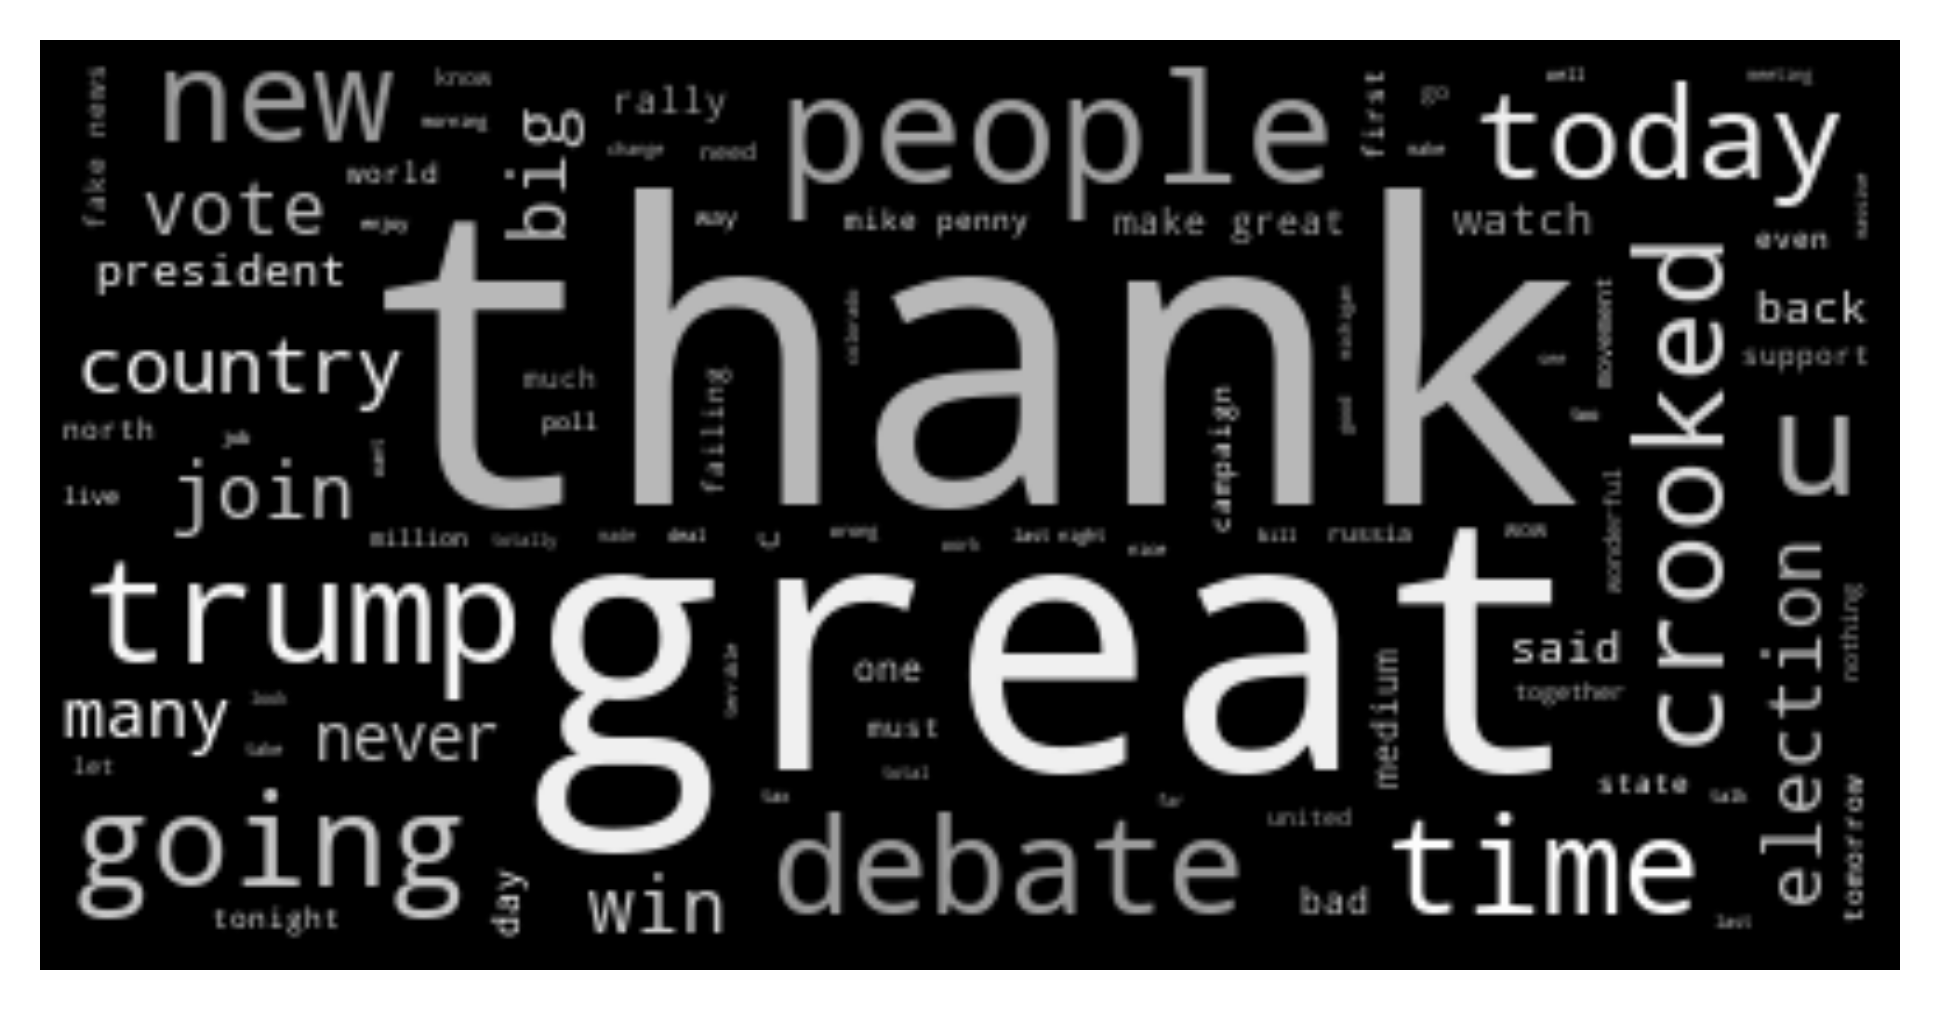

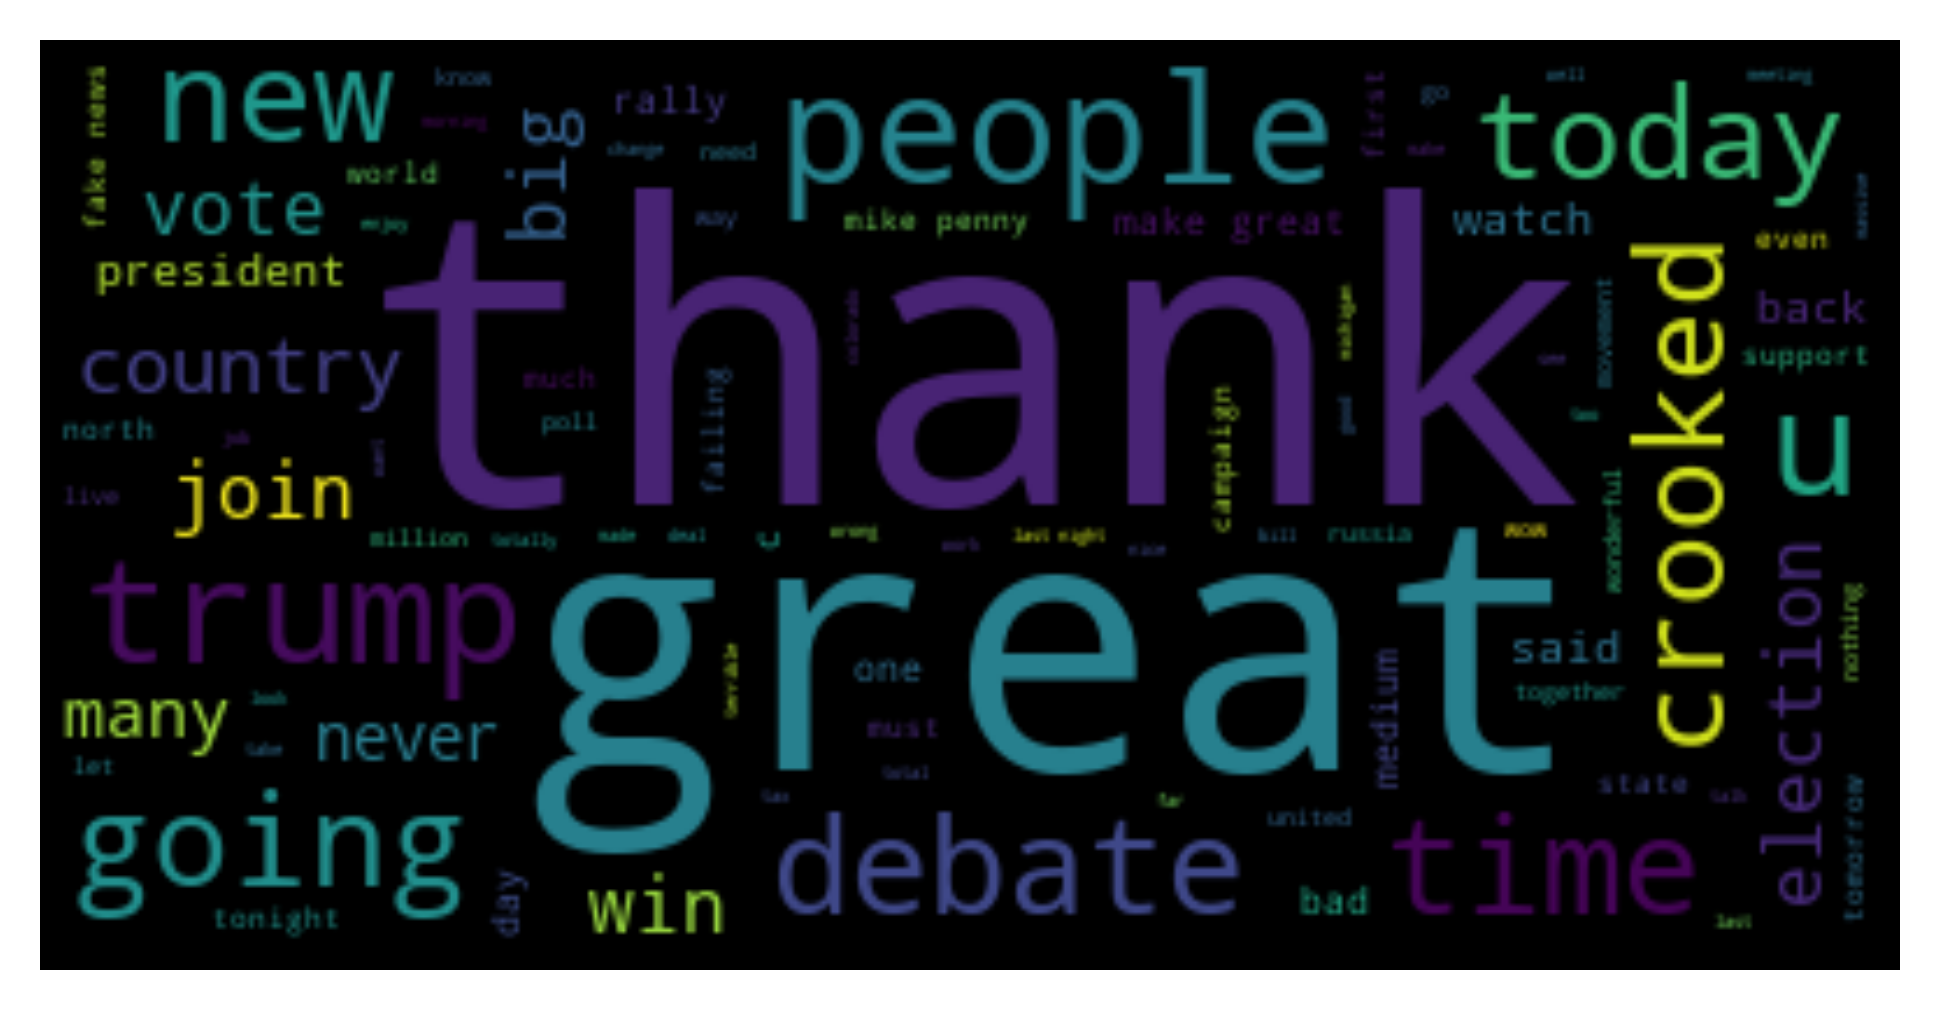

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


wc = WordCloud(max_words=1000, margin=10,
               random_state=1).generate(" ".join(lemmed))
# store default colored image
plt.rcParams['savefig.dpi'] = 1600  #图片像素
plt.rcParams['figure.dpi'] = 400  #分辨率
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
# LDA topic analysis

from sklearn.feature_extraction.text import CountVectorizer
import mglearn

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(lemmed)

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(learning_method="batch", max_iter=25, random_state=0)

In [50]:
document_topics = lda.fit_transform(X)

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
president     great         new           trump         time          
never         vote          back          medium        debate        
tomorrow      crooked       watch         last          going         
live          penny         bad           like          today         
world         would         together      movement      poll          
safe          one           state         even          campaign      
let           fake          night         national      need          
meeting       wow           soon          look          year          
made          say           wonderful     go            making        
change        gave          take          terrible      report        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
elec

In [51]:
# sentiment analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

sentimentAnalyze = []

analyzer = SentimentIntensityAnalyzer()
for sentence in text:
    vs = analyzer.polarity_scores(sentence)
    # print("{:-<65} {}".format(sentence, str(vs)))
    sentimentAnalyze.append(str(vs["compound"]))

In [53]:
df_sentiment = pd.DataFrame([[i, j] for i, j in zip(text, sentimentAnalyze)])
df_sentiment.columns = ["sentence", "sentiment"]
df_sentiment.sentiment = df_sentiment.sentiment.astype("float")
print("the percent of positive sentiment of Hillary tweet is {}%".format((
                                                                                 len(df_sentiment[
                                                                                         df_sentiment.sentiment > 0.05]) / len(
                                                                             df_sentiment)) * 100))
print("the percent of neutral sentiment of Hillary tweet is {}%".format((
                                                                                len(df_sentiment[
                                                                                        abs(df_sentiment.sentiment) < 0.05]) / len(
                                                                            df_sentiment)) * 100))
print("the percent of negative sentiment of Hillary tweet is {}%".format((
                                                                                 len(df_sentiment[
                                                                                         df_sentiment.sentiment < -0.05]) / len(
                                                                             df_sentiment)) * 100))

the percent of positive sentiment of Hillary tweet is 53.967213114754095%
the percent of neutral sentiment of Hillary tweet is 18.295081967213115%
the percent of negative sentiment of Hillary tweet is 27.737704918032787%
